In [1]:
# Import the Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
data=pd.read_csv('healthCare_diabetes.csv')

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.shape

(768, 9)

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [12]:
# the following columns don't have to be zero value 
column_names={"Glucose","BloodPressure","SkinThickness","Insulin","BMI"}
zero_counts = {}

for column in column_names:
    zero_counts[column] = (data[column] == 0).sum()

print(zero_counts)

{'BMI': 11, 'Insulin': 374, 'Glucose': 5, 'SkinThickness': 227, 'BloodPressure': 35}


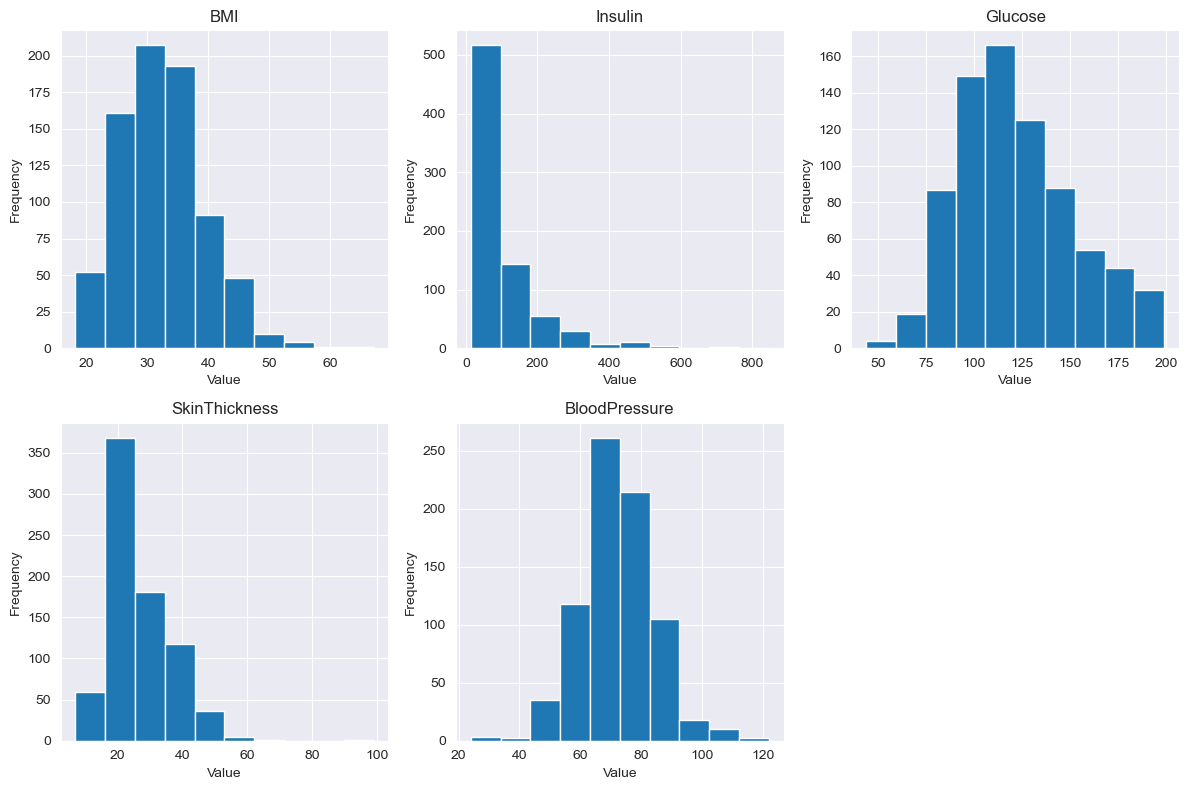

In [30]:
# we can visulaize the missing values using histogram 
num_rows = 2
num_cols = 3
total_plots = num_rows * num_cols

# Create a new figure and set the size
fig = plt.figure(figsize=(12, 8))

# Loop through the columns and create subplots
for i, column in enumerate(column_names):
    # Create a subplot
    ax = fig.add_subplot(num_rows, num_cols, i+1)

    # Plot the histogram
    ax.hist(data[column])

    # Set the title, x-label, and y-label
    ax.set_title(column)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Adjust the spacing between subplots
fig.tight_layout()
fig.savefig('histogram_layout.png')
# Display the plots
plt.show()

In [15]:
for column in column_names:
    data[column].replace(to_replace = 0, value = data[column].mean(), inplace=True)

zero_counts = {}
for column in column_names:
    zero_counts[column] = (data[column] == 0).sum()

print(zero_counts)

{'BMI': 0, 'Insulin': 0, 'Glucose': 0, 'SkinThickness': 0, 'BloodPressure': 0}


Count of class is 0    500
1    268
Name: Outcome, dtype: int64


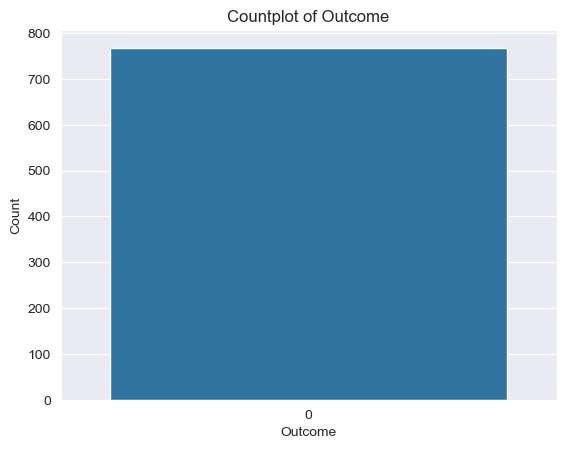

In [20]:
# Count plot for the outcome

#sns.set_style('darkgrid')
sns.countplot(data['Outcome'])
plt.title("Countplot of Outcome")
plt.xlabel('Outcome')
plt.ylabel("Count")
print("Count of class is",data['Outcome'].value_counts())

In [21]:
import tensorflow as tf

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [23]:
X = data.drop("Outcome", axis=1).values
y = data["Outcome"].values

In [25]:
# Train-Test Split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
# Baseline Model
model = Sequential()
model.add(Dense(32, activation="relu", input_shape=(8,)))
model.add(Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate the baseline model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Model - Accuracy:", accuracy)

Epoch 1/10
20/20 [==============================] - 3s 12ms/step - loss: 5.5610 - accuracy: 0.5765
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 2.6612 - accuracy: 0.4463
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 1.8585 - accuracy: 0.4870
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 1.4429 - accuracy: 0.4756
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 1.1311 - accuracy: 0.5749
Epoch 6/10
20/20 [==============================] - 0s 4ms/step - loss: 0.9574 - accuracy: 0.6059
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.8898 - accuracy: 0.5896
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 0.7893 - accuracy: 0.6482
Epoch 9/10
20/20 [==============================] - 0s 2ms/step - loss: 0.7790 - accuracy: 0.6140
Epoch 10/10
20/20 [==============================] - 0s 2ms/step - loss: 0.7943 - accuracy: 0.6384
Baseline Model - A

5/5 [==============================] - 0s 2ms/step


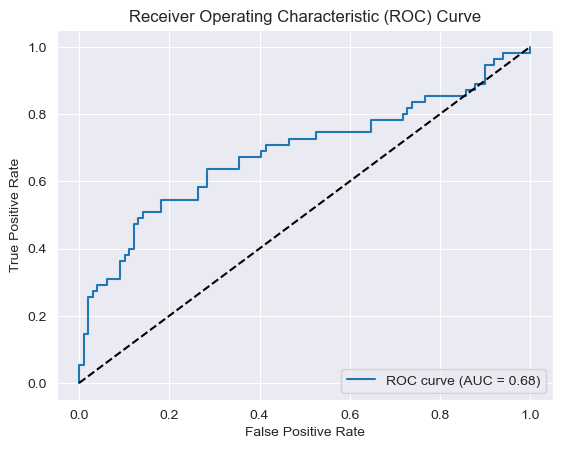

In [34]:
from sklearn import metrics

y_pred = model.predict(X_test)
y_pred_prob = np.squeeze(y_pred)  # Remove dimensions of size 1

# Generate ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [27]:
#  Model Variations
# Variation 1: Adding more hidden layers
model_variation1 = Sequential()
model_variation1.add(Dense(32, activation="relu", input_shape=(8,)))
model_variation1.add(Dense(16, activation="relu"))
model_variation1.add(Dense(1, activation="sigmoid"))
model_variation1.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])
model_variation1.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
# Evaluate model_variation1
loss, accuracy = model_variation1.evaluate(X_test, y_test, verbose=0)
print("Model Variation 1 - Accuracy:", accuracy)

Epoch 1/10
20/20 [==============================] - 1s 2ms/step - loss: 9.9661 - accuracy: 0.6287
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 3.7213 - accuracy: 0.3730
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 2.0429 - accuracy: 0.5212
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 1.4496 - accuracy: 0.5033
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 1.0679 - accuracy: 0.5407
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.9323 - accuracy: 0.5782
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 0.8524 - accuracy: 0.6026
Epoch 8/10
20/20 [==============================] - 0s 3ms/step - loss: 0.8754 - accuracy: 0.6140
Epoch 9/10
20/20 [==============================] - 0s 3ms/step - loss: 0.8127 - accuracy: 0.6221
Epoch 10/10
20/20 [==============================] - 0s 3ms/step - loss: 0.7882 - accuracy: 0.6564
Model Variation 1 -

5/5 [==============================] - 0s 3ms/step


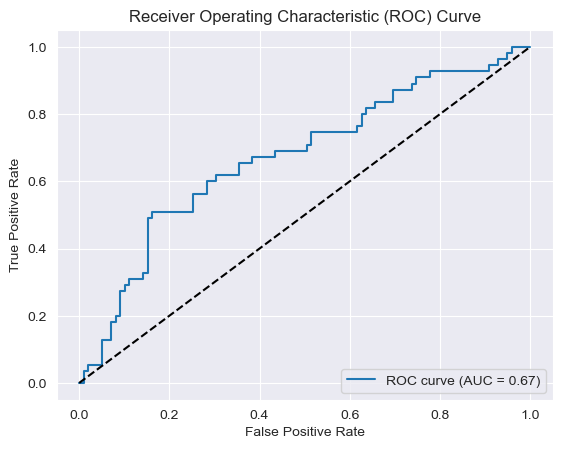

In [35]:
y_pred = model_variation1.predict(X_test)
y_pred_prob = np.squeeze(y_pred)  # Remove dimensions of size 1

# Generate ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
roc_auc = metrics.roc_auc_score(y_test, y_pred_prob)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Plot diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [28]:
# Variation 2: Applying L2 regularization
model_variation2 = Sequential()
model_variation2.add(Dense(32, activation="relu", input_shape=(8,), kernel_regularizer=regularizers.l2(0.01)))
model_variation2.add(Dense(1, activation="sigmoid"))

model_variation2.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

model_variation2.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# Evaluate model_variation2
loss, accuracy = model_variation2.evaluate(X_test, y_test, verbose=0)
print("Model Variation 2 - Accuracy:", accuracy)

Epoch 1/10
20/20 [==============================] - 1s 2ms/step - loss: 8.7048 - accuracy: 0.3974
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 6.3858 - accuracy: 0.4055
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 4.4658 - accuracy: 0.3909
Epoch 4/10
20/20 [==============================] - 0s 3ms/step - loss: 2.9592 - accuracy: 0.3990
Epoch 5/10
20/20 [==============================] - 0s 3ms/step - loss: 2.0068 - accuracy: 0.4316
Epoch 6/10
20/20 [==============================] - 0s 3ms/step - loss: 1.7070 - accuracy: 0.4967
Epoch 7/10
20/20 [==============================] - 0s 3ms/step - loss: 1.5856 - accuracy: 0.5033
Epoch 8/10
20/20 [==============================] - 0s 4ms/step - loss: 1.4509 - accuracy: 0.5326
Epoch 9/10
20/20 [==============================] - 0s 2ms/step - loss: 1.3463 - accuracy: 0.5407
Epoch 10/10
20/20 [==============================] - 0s 4ms/step - loss: 1.2905 - accuracy: 0.5570
Model Variation 2 -